# ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
import sklearn.metrics as metrics

# Input Data

In [2]:
df = pd.read_csv('../Data.csv')

In [3]:
dft = pd.read_csv('testing7.csv')

In [4]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
X_train = df.drop('label',axis=1).values
y_train = df['label'].values

X_test = dft.drop('label',axis=1).values
y_test = dft['label'].values

# One-hot encode the target

In [5]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y_train.reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1))

In [6]:
print(y_train.shape, y_test.shape)

(18000, 6) (1500, 6)


# scale the features

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential()

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=521,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
%%time
model.fit(x=X_train, y=y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test))

Train on 18000 samples, validate on 1500 samples
Epoch 1/100
18000/18000 [==============================] - 2s 89us/sample - loss: 1.6929 - accuracy: 0.2702 - val_loss: 1.6460 - val_accuracy: 0.3100
Epoch 2/100
18000/18000 [==============================] - 0s 23us/sample - loss: 1.4419 - accuracy: 0.4242 - val_loss: 1.4964 - val_accuracy: 0.4260
Epoch 3/100
18000/18000 [==============================] - 0s 23us/sample - loss: 1.3237 - accuracy: 0.4942 - val_loss: 1.2767 - val_accuracy: 0.5860
Epoch 4/100
18000/18000 [==============================] - 0s 23us/sample - loss: 1.2314 - accuracy: 0.5354 - val_loss: 1.1683 - val_accuracy: 0.5993
Epoch 5/100
18000/18000 [==============================] - 0s 23us/sample - loss: 1.1684 - accuracy: 0.5574 - val_loss: 1.1204 - val_accuracy: 0.6147
Epoch 6/100
18000/18000 [==============================] - 0s 23us/sample - loss: 1.1193 - accuracy: 0.5773 - val_loss: 1.0529 - val_accuracy: 0.6500
Epoch 7/100
18000/18000 [==========================

Epoch 55/100
18000/18000 [==============================] - 0s 23us/sample - loss: 0.3879 - accuracy: 0.8518 - val_loss: 0.4770 - val_accuracy: 0.8673
Epoch 56/100
18000/18000 [==============================] - 0s 23us/sample - loss: 0.3793 - accuracy: 0.8569 - val_loss: 0.4998 - val_accuracy: 0.8760
Epoch 57/100
18000/18000 [==============================] - 0s 23us/sample - loss: 0.3831 - accuracy: 0.8537 - val_loss: 0.5020 - val_accuracy: 0.8667
Epoch 58/100
18000/18000 [==============================] - 0s 23us/sample - loss: 0.3770 - accuracy: 0.8580 - val_loss: 0.4661 - val_accuracy: 0.8740
Epoch 59/100
18000/18000 [==============================] - 0s 23us/sample - loss: 0.3672 - accuracy: 0.8606 - val_loss: 0.4887 - val_accuracy: 0.8627
Epoch 60/100
18000/18000 [==============================] - 0s 23us/sample - loss: 0.3741 - accuracy: 0.8589 - val_loss: 0.4369 - val_accuracy: 0.8807
Epoch 61/100
18000/18000 [==============================] - 0s 23us/sample - loss: 0.3684 - ac

# Modle Performance

In [10]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

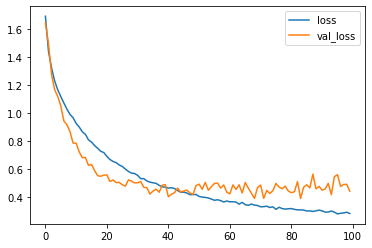

In [11]:
losses[['loss','val_loss']].plot()

# Predict

In [12]:
predictions = model.predict(X_test)


# Confusion Matrix

In [13]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(predictions,axis=1)

In [14]:
print(confusion_matrix(y_test_arg, Y_pred))

[[248   1   0   0   1   0]
 [  0 152   0   0  98   0]
 [  0   0 237   0   0  13]
 [  0  37   1 211   0   1]
 [  0   0   0   0 250   0]
 [  4   0   0   0   0 246]]


<AxesSubplot:>

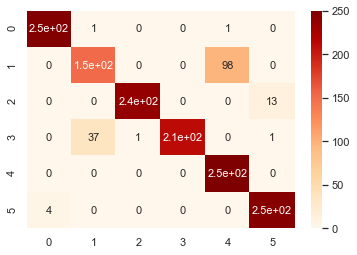

In [15]:
array = metrics.confusion_matrix(y_test_arg, Y_pred)
df_cm = pd.DataFrame(array, range(6), range(6))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 11}, cmap="OrRd") # font size

# classification Report

In [16]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       250
           1       0.80      0.61      0.69       250
           2       1.00      0.95      0.97       250
           3       1.00      0.84      0.92       250
           4       0.72      1.00      0.83       250
           5       0.95      0.98      0.96       250

    accuracy                           0.90      1500
   macro avg       0.91      0.90      0.89      1500
weighted avg       0.91      0.90      0.89      1500

